In [7]:
import pandas as pd    
import seaborn as sns     
import numpy as np        
import matplotlib.pyplot as plt     
from scipy import stats 

In [11]:
bank_df=pd.read_csv("bank-additional-full.csv")

In [12]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
bank_df.shape

(41188, 21)

In [14]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
bank_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [17]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
bank_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [19]:
bank_df=bank_df.rename(columns={'y':'target'})

In [20]:
bank_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [21]:
bank_df.target.value_counts()

no     36548
yes     4640
Name: target, dtype: int64

Text(0.5, 1.0, 'correlation matrix for numerical variables')

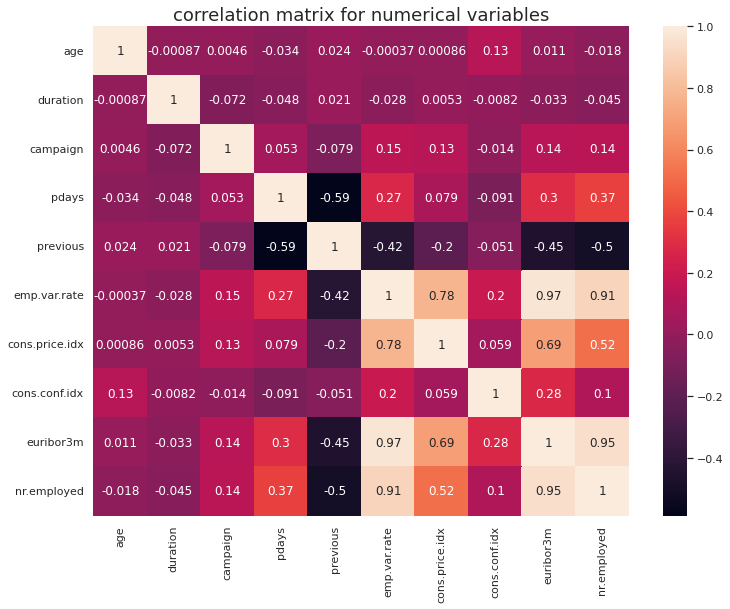

In [22]:
corrmat = bank_df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True,)
plt.title('correlation matrix for numerical variables',fontsize=18)

### Handle highly correlated variables

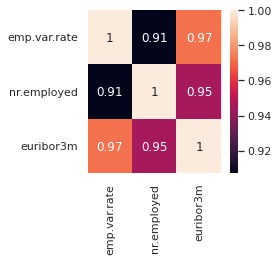

In [23]:
sns.heatmap(bank_df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True)
plt.show()

Positive high correlation between:

Euribor is the acronym for the Euro Interbank Offered Rate. This is the interest rate at which credit institutions lend money to each other, which is often referred to as “the price of money”.

With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor. So we will drop 'emp.var.rate' and 'nr.employed' as 'euribor'.

In [24]:
bank_df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [25]:
bank_df.shape

(41188, 19)

In [26]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,1.028,yes


In [27]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'target'],
      dtype='object')

### Handling NAN and Unknown values

In [28]:
bank_df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

As we can see 39673 values are 999 that shows client was not previously contacted,this can add bias to our model hence converting this column to categorical column. other values 3-27 are low in number.

In [29]:
bank_df['pdays'] = bank_df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

In [30]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,4.857,no


In [31]:
bank_df.pdays.value_counts()

0     39673
20     1311
6       196
3         8
Name: pdays, dtype: int64

In [32]:
#converting target variable in 0 for no and 1 for yes
bank_df['target']=bank_df['target'].replace({'no':0,'yes':1})

In [33]:
bank_df.target.value_counts()

0    36548
1     4640
Name: target, dtype: int64

### separating categorical variable

In [34]:
var_categorical=bank_df.select_dtypes(include=['object'])

In [35]:
var_categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


### separating numerical value

In [36]:
var_numerical = bank_df.select_dtypes(exclude=['object'])

In [37]:
var_numerical


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,target
0,56,261,1,0,0,93.994,-36.4,4.857,0
1,57,149,1,0,0,93.994,-36.4,4.857,0
2,37,226,1,0,0,93.994,-36.4,4.857,0
3,40,151,1,0,0,93.994,-36.4,4.857,0
4,56,307,1,0,0,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,94.767,-50.8,1.028,1
41184,46,383,1,0,0,94.767,-50.8,1.028,0
41185,56,189,2,0,0,94.767,-50.8,1.028,0
41186,44,442,1,0,0,94.767,-50.8,1.028,1


In [38]:
cols = bank_df.columns

In [39]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)   

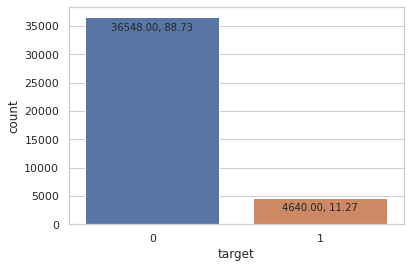

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.countplot(x = bank_df["target"]) 
label_values(ax, spacing=-15)
plt.show()

Job


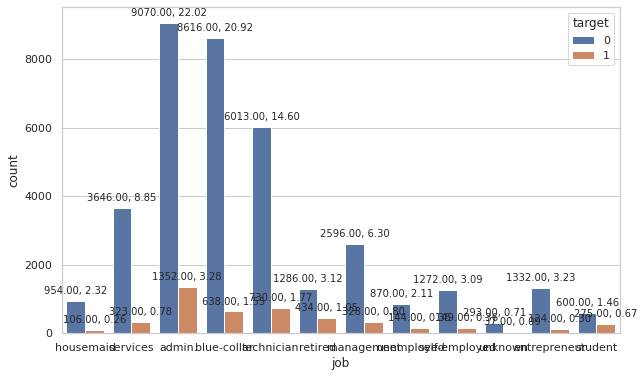

Marital


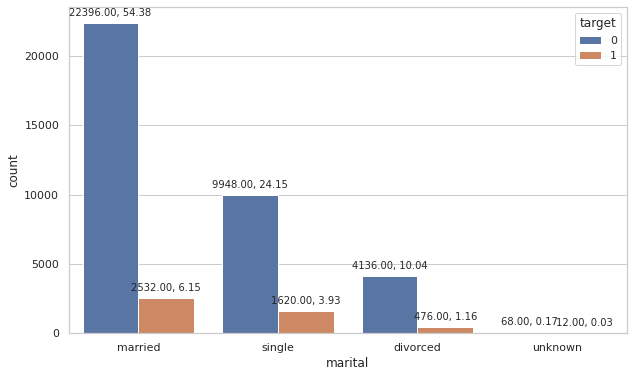

Education


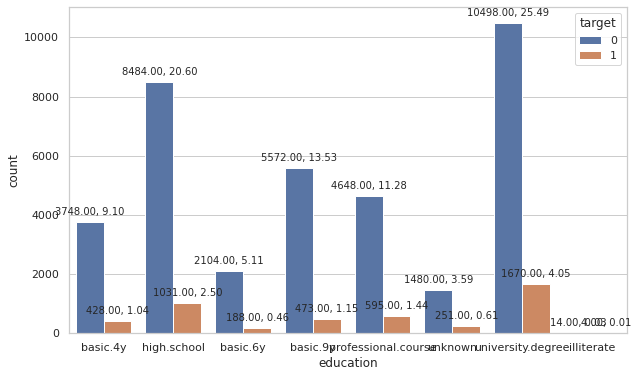

Default


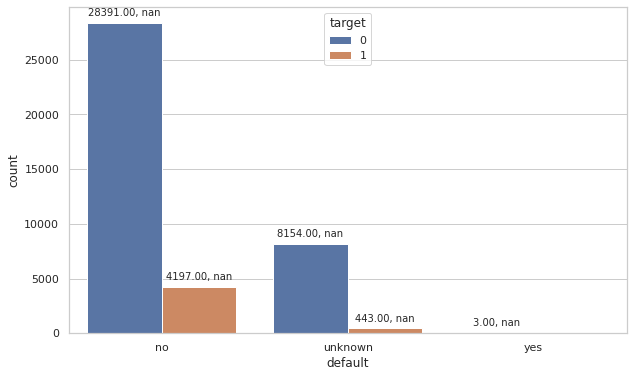

Housing


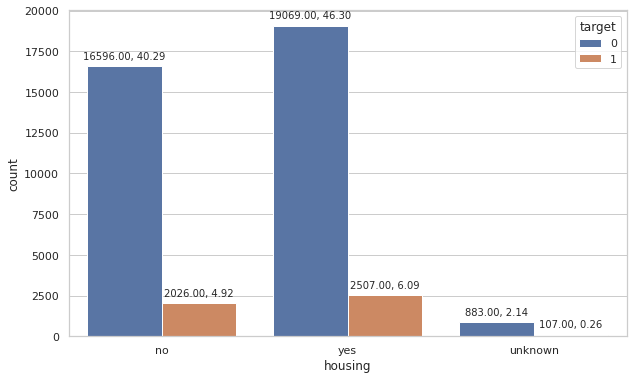

Loan


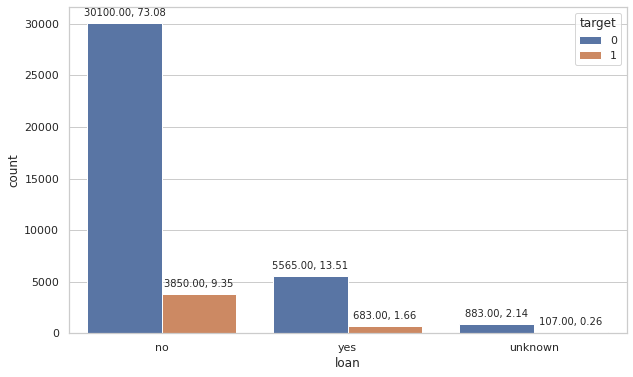

Contact


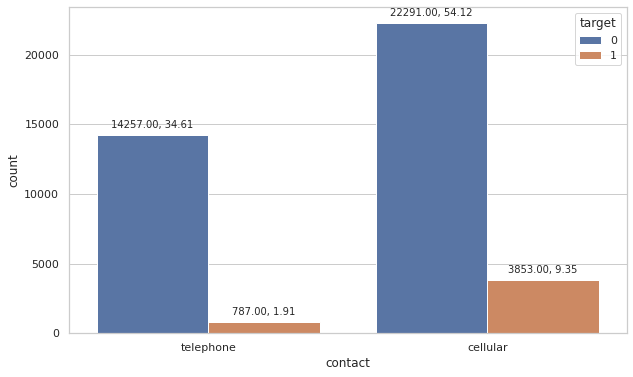

Month


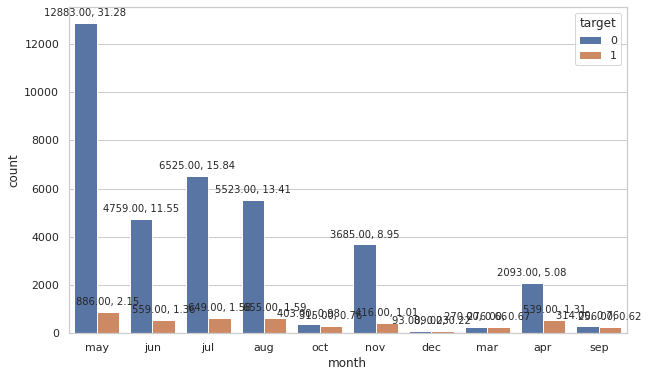

Day_Of_Week


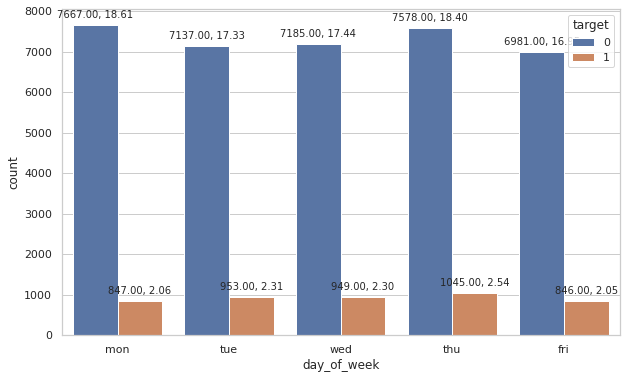

Poutcome


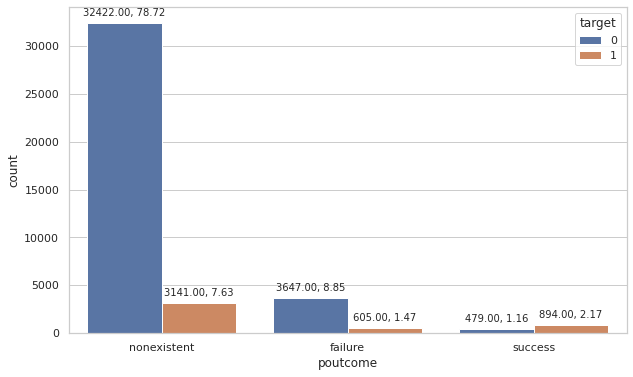

In [41]:
for column in var_categorical:
    plt.figure(figsize=(10, 6))
    print(column.title())
    ax = sns.countplot(x = bank_df[column], hue=bank_df["target"])
    label_values(ax)
    plt.show()

Job : Highest Number of application are from admin type of job.

Marital: most of the clients approached were married.

Education: Client with university degree and high school were approached more as compare to other and they have higher success rate compaired to others.
default: it doesn't shows much impact.

Housing: Housing loan does not have much effect on the number of term deposit purchased.

Loan: most of client with not having personal loan were approched most.

Contact: Around 64% calls are from cellular.

Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August.

day_of_week : We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed. So we will drop this feature.

poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

In [42]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,4.857,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,4.857,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,4.857,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,4.857,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,94.767,-50.8,1.028,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,94.767,-50.8,1.028,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,94.767,-50.8,1.028,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,94.767,-50.8,1.028,1


In [43]:
var_numerical = var_numerical.drop('target',axis=1)

In [44]:
var_numerical.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m'],
      dtype='object')

In [45]:
df_test=bank_df.target.astype(dtype='bool')

In [46]:
df_test.shape

(41188,)

In [47]:
df_test.dtype

dtype('bool')

In [48]:
var_categorical.shape

(41188, 10)

In [49]:
var_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [50]:
dummy_columns_df=pd.get_dummies(var_categorical,drop_first=True)
dummy_columns_df.shape

(41188, 43)

### One Hot Encoding for categorical variables

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [51]:
'''# variables for contact, poutcome , job, month, marital,  education
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 

bank_df['job'] = bank_df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
bank_df['housing'] = bank_df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
bank_df['marital'] = bank_df['marital'].apply(lambda x: 0 if x=='single' else (1 if x=='married' else (2 if x=='divorced' else -1)))
bank_df['loan'] = bank_df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
bank_df['poutcome'] = bank_df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))
'''

"# variables for contact, poutcome , job, month, marital,  education\n# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns \n\nbank_df['job'] = bank_df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))\nbank_df['housing'] = bank_df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))\nbank_df['marital'] = bank_df['marital'].apply(lambda x: 0 if x=='single' else (1 if x=='married' else (2 if x=='divorced' else -1)))\nbank_df['loan'] = bank_df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))\nbank_df['poutcome'] = bank_df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))\n"

In [52]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,4.857,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,4.857,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,4.857,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,4.857,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,94.767,-50.8,1.028,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,94.767,-50.8,1.028,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,94.767,-50.8,1.028,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,94.767,-50.8,1.028,1


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dummy_numbers=pd.DataFrame(scaler.fit_transform(var_numerical),columns=var_numerical.columns)

In [54]:
dummy_numbers

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,1.533034,0.010471,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
1,1.628993,-0.421501,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
2,-0.290186,-0.124520,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
3,-0.002309,-0.413787,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
4,1.533034,0.187888,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460
...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186
41184,0.573445,0.481012,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186
41185,1.533034,-0.267225,-0.204909,-0.188585,-0.349494,2.058168,-2.224953,-1.495186
41186,0.381527,0.708569,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186


In [55]:
df_train = pd.concat([dummy_numbers, dummy_columns_df], axis=1,sort=False)
df_train

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1.628993,-0.421501,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.290186,-0.124520,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,0,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.002309,-0.413787,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,0,0,...,1,0,0,0,1,0,0,0,1,0
4,1.533034,0.187888,-0.565922,-0.188585,-0.349494,0.722722,0.886447,0.712460,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,0.573445,0.481012,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186,1,0,...,0,1,0,0,0,0,0,0,1,0
41185,1.533034,-0.267225,-0.204909,-0.188585,-0.349494,2.058168,-2.224953,-1.495186,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,0.381527,0.708569,-0.565922,-0.188585,-0.349494,2.058168,-2.224953,-1.495186,0,0,...,0,1,0,0,0,0,0,0,1,0


## Reviewed by Kashish and Amir

### Key Points:

from corelation on dataset she found out positive corelated values which needs to be removed from data. 

while handling unknown and NAN values she found out 'pdays' has 39673 values are 999 that shows client was not previously contacted,this can add bias to our model hence converting this column to categorical column. other values 3-27 are low in number. so decided to use one hot encoding on "pdays" and converted into numerical value.

she decided to keep unknown values as to use minskowski error which reduces impacts of outliers on model and used one hot encoding on categorical variable convert it into numerical value. 

she identified the variable that has predictive power using weight of evidence and information value.

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,df_test,test_size=0.2,random_state=101)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 51)
(8238, 51)
(32950,)
(8238,)


In [58]:
from collections import Counter
print(Counter(y_train))


Counter({False: 29269, True: 3681})


In [59]:
from imblearn.over_sampling import RandomOverSampler
RO = RandomOverSampler(sampling_strategy='minority')

In [60]:
X_train_os,y_train_os = RO.fit_resample(X_train,y_train)

In [61]:
X_train_os.shape,y_train_os.shape

((58538, 51), (58538,))

In [62]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_os))

Counter({False: 29269, True: 3681})
Counter({False: 29269, True: 29269})


# **Decision Tree Classifier**

In [67]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pylab
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (3, 3)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [68]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [70]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [25, 50, 75, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
decision_tree = clf.fit(X_train_os, y_train_os)

In [71]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'best'}

In [72]:
clf.best_score_

0.9640146475092053

In [73]:
# DataFrame to store results
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

In [74]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.522
Area under ROC on test data is : 0.734
Accuracy on test data is : 0.885


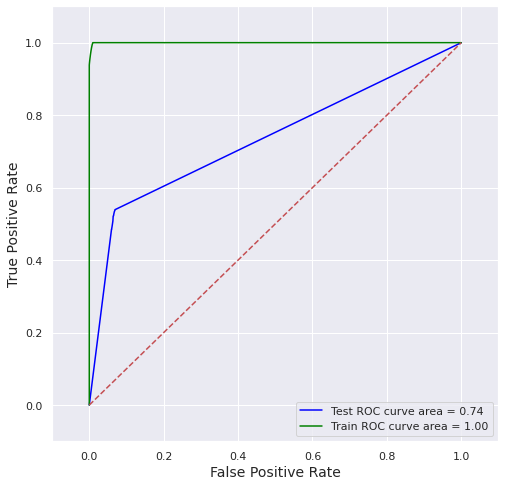

In [75]:

sns.set_style('darkgrid')
preds_train = decision_tree.predict(X_train_os)
# calculate prediction probability
prob_train3 = np.squeeze(decision_tree.predict_proba(X_train_os)[:,1].reshape(1,-1))
prob_test3 = np.squeeze(decision_tree.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test3)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train_os, prob_train3)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

# **Logistic Regression**

In [76]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
log_reg = clf.fit(X_train_os, y_train_os)

In [77]:
clf.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}

In [78]:
clf.best_score_

0.8732665853180416

In [79]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.595
Area under ROC on test data is : 0.870
Accuracy on test data is : 0.860


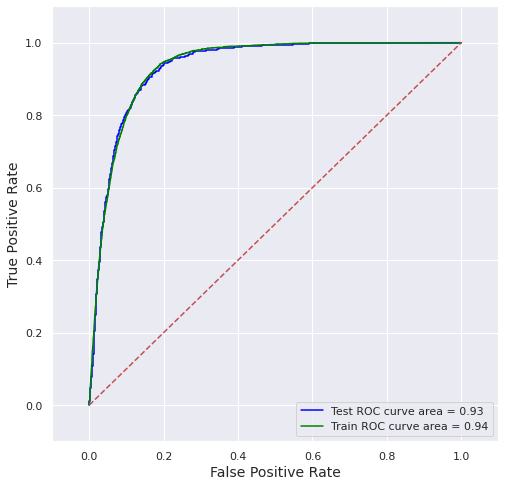

In [80]:
#logistic regression
sns.set_style('darkgrid')
preds_train = log_reg.predict(X_train_os)
# calculate prediction probability
prob_train3 = np.squeeze(log_reg.predict_proba(X_train_os)[:,1].reshape(1,-1))
prob_test3 = np.squeeze(log_reg.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test3)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train_os, prob_train3)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

# **Random Forest Classifier**

In [81]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [25, 50, 75],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
        }
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
forest = clf.fit(X_train_os, y_train_os)

In [82]:
f1_score(y_test, clf.predict(X_test))

0.6584180291648255

In [83]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [84]:
clf.best_score_

0.9572719690017031

In [85]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.658
Area under ROC on test data is : 0.850
Accuracy on test data is : 0.906


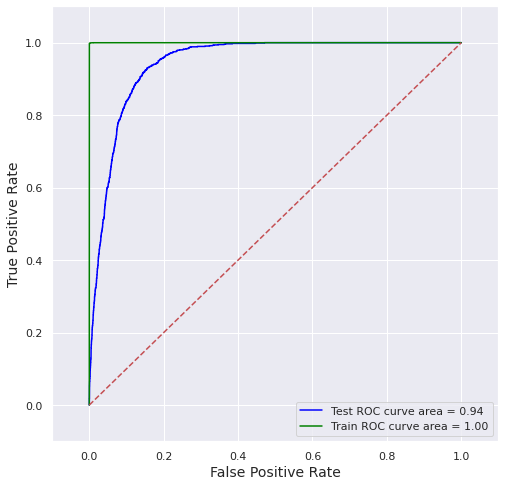

In [86]:
sns.set_style('darkgrid')
preds_train = forest.predict(X_train_os)
# calculate prediction probability
prob_train3 = np.squeeze(forest.predict_proba(X_train_os)[:,1].reshape(1,-1))
prob_test3 = np.squeeze(forest.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test3)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train_os, prob_train3)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

# **Gaussian Naive Bayes**

In [87]:
params = {}
clf = GridSearchCV(estimator = GaussianNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
naive = clf.fit(X_train_os, y_train_os)

In [88]:
clf.best_score_

0.6891573495640523

In [89]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Gaussian Naive Bayes", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.447
Area under ROC on test data is : 0.733
Accuracy on test data is : 0.823


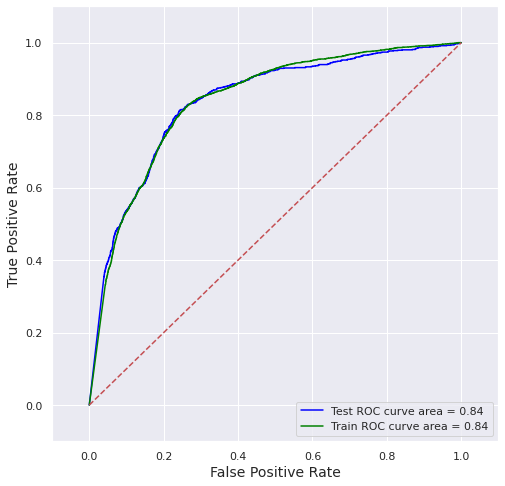

In [90]:
sns.set_style('darkgrid')
preds_train = naive.predict(X_train_os)
# calculate prediction probability
prob_train3 = np.squeeze(naive.predict_proba(X_train_os)[:,1].reshape(1,-1))
prob_test3 = np.squeeze(naive.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test3)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train_os, prob_train3)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

# **Multi Layer Perceptron**

In [91]:
params = [
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["adam", "lbfgs"], 
                "alpha" : [0.0001, 0.001], 
                "max_iter" : [100, 200]
            },
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["sgd"], 
                "alpha" : [0.0001, 0.001], 
                "learning_rate" : ["constant", "invscaling", "adaptive"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = MLPClassifier(early_stopping = True, activation = "relu"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
perceptron = clf.fit(X_train_os, y_train_os)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

In [92]:
clf.best_params_

{'alpha': 0.001,
 'hidden_layer_sizes': (50, 50, 50),
 'max_iter': 200,
 'solver': 'adam'}

In [93]:
clf.best_score_

0.9538643542079523

In [94]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Multi Layer Perceptron", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.574
Area under ROC on test data is : 0.795
Accuracy on test data is : 0.882


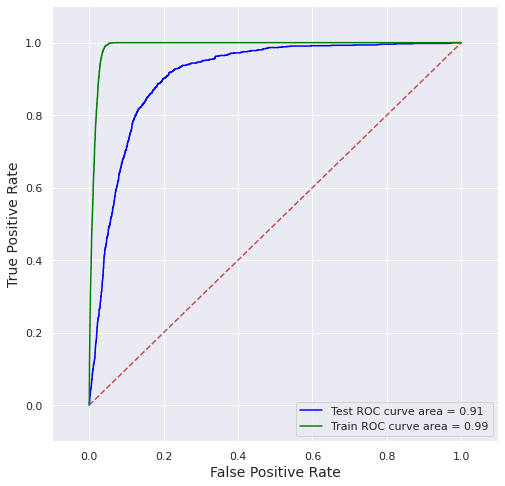

In [95]:
sns.set_style('darkgrid')
preds_train = perceptron.predict(X_train_os)
# calculate prediction probability
prob_train3 = np.squeeze(perceptron.predict_proba(X_train_os)[:,1].reshape(1,-1))
prob_test3 = np.squeeze(perceptron.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test3)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train_os, prob_train3)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()